# 데이터셋
데이콘 Basic 축구선수의 유망 여부 예측 AI 경진대회
- 16세부터 21세의 축구 선수들의 유망 여부를 예측하는 AI 알고리즘 개발


https://dacon.io/competitions/official/236031/overview/description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv("data/football/train.csv")
print(train.shape)
train.head()

(3019, 66)


,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
0,TRAIN_0000,21,182,82,CB,Right,Medium,Medium,4.6377,2.1053,...,4.9315,4.8649,6.1972,6.0000,6.1972,6.4286,6.5278,6.4286,0.875,0
1,TRAIN_0001,21,160,75,ST,Left,High,Medium,7.3913,7.3684,...,5.8904,6.4865,5.2113,4.4286,5.2113,5.0000,4.1667,5.0000,1.250,0
2,TRAIN_0002,18,165,60,RB,Right,Medium,Medium,6.2319,3.2895,...,4.9315,5.2703,5.7746,5.1429,5.7746,5.8571,5.0000,5.8571,0.750,0
3,TRAIN_0003,20,190,72,CB,Right,Medium,Medium,4.7826,1.0526,...,2.3288,2.2973,4.0845,3.7143,4.0845,4.5714,4.5833,4.5714,0.875,0
4,TRAIN_0004,21,181,77,ST,Right,High,Medium,8.2609,7.3684,...,6.3014,7.5676,5.2113,4.2857,5.2113,4.7143,3.3333,4.7143,1.125,0


In [3]:
test = pd.read_csv("data/football/test.csv")
print(test.shape)
test.head()

(1626, 65)


,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,TEST_0000,17,184,75,GK,Right,Medium,Medium,3.7681,5.3947,...,0.1351,0.5479,0.1351,0.2817,0.4286,0.2817,0.2857,0.2778,0.2857,5.500
1,TEST_0001,19,188,80,ST,Right,High,Medium,4.9275,4.8684,...,4.1892,3.4247,4.1892,3.0986,2.7143,3.0986,3.0000,3.0556,3.0000,0.750
2,TEST_0002,17,173,68,CAM,Right,High,High,6.9565,6.3158,...,8.3784,8.6301,8.3784,8.3099,8.2857,8.3099,8.1429,7.0833,8.1429,1.125
3,TEST_0003,20,178,69,CAM,Right,Medium,Medium,6.8116,6.4474,...,7.1622,6.7123,7.1622,5.6338,5.1429,5.6338,5.2857,4.1667,5.2857,1.375
4,TEST_0004,19,176,72,CAM,Left,High,Low,5.5072,4.7368,...,5.9459,5.4795,5.9459,5.0704,4.7143,5.0704,4.8571,4.0278,4.8571,0.750


# EDA

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3019 non-null   object 
 1   Age                3019 non-null   int64  
 2   Height             3019 non-null   int64  
 3   Weight             3019 non-null   int64  
 4   Position           3019 non-null   object 
 5   PreferredFoot      3019 non-null   object 
 6   AttackingWorkRate  3019 non-null   object 
 7   DefensiveWorkRate  3019 non-null   object 
 8   PaceTotal          3019 non-null   float64
 9   ShootingTotal      3019 non-null   float64
 10  PassingTotal       3019 non-null   float64
 11  DribblingTotal     3019 non-null   float64
 12  DefendingTotal     3019 non-null   float64
 13  PhysicalityTotal   3019 non-null   float64
 14  Crossing           3019 non-null   float64
 15  Finishing          3019 non-null   float64
 16  HeadingAccuracy    3019 

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1626 non-null   object 
 1   Age                1626 non-null   int64  
 2   Height             1626 non-null   int64  
 3   Weight             1626 non-null   int64  
 4   Position           1626 non-null   object 
 5   PreferredFoot      1626 non-null   object 
 6   AttackingWorkRate  1626 non-null   object 
 7   DefensiveWorkRate  1626 non-null   object 
 8   PaceTotal          1626 non-null   float64
 9   ShootingTotal      1626 non-null   float64
 10  PassingTotal       1626 non-null   float64
 11  DribblingTotal     1626 non-null   float64
 12  DefendingTotal     1626 non-null   float64
 13  PhysicalityTotal   1626 non-null   float64
 14  Crossing           1626 non-null   float64
 15  Finishing          1626 non-null   float64
 16  HeadingAccuracy    1626 

<AxesSubplot:xlabel='Age', ylabel='Count'>

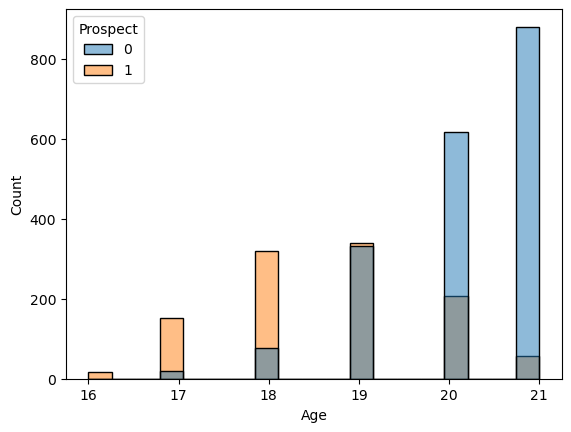

In [6]:
sns.histplot(data=train, x="Age", hue="Prospect")

In [7]:
train.isnull().sum().sum()

0

In [8]:
test.isnull().sum().sum()

0

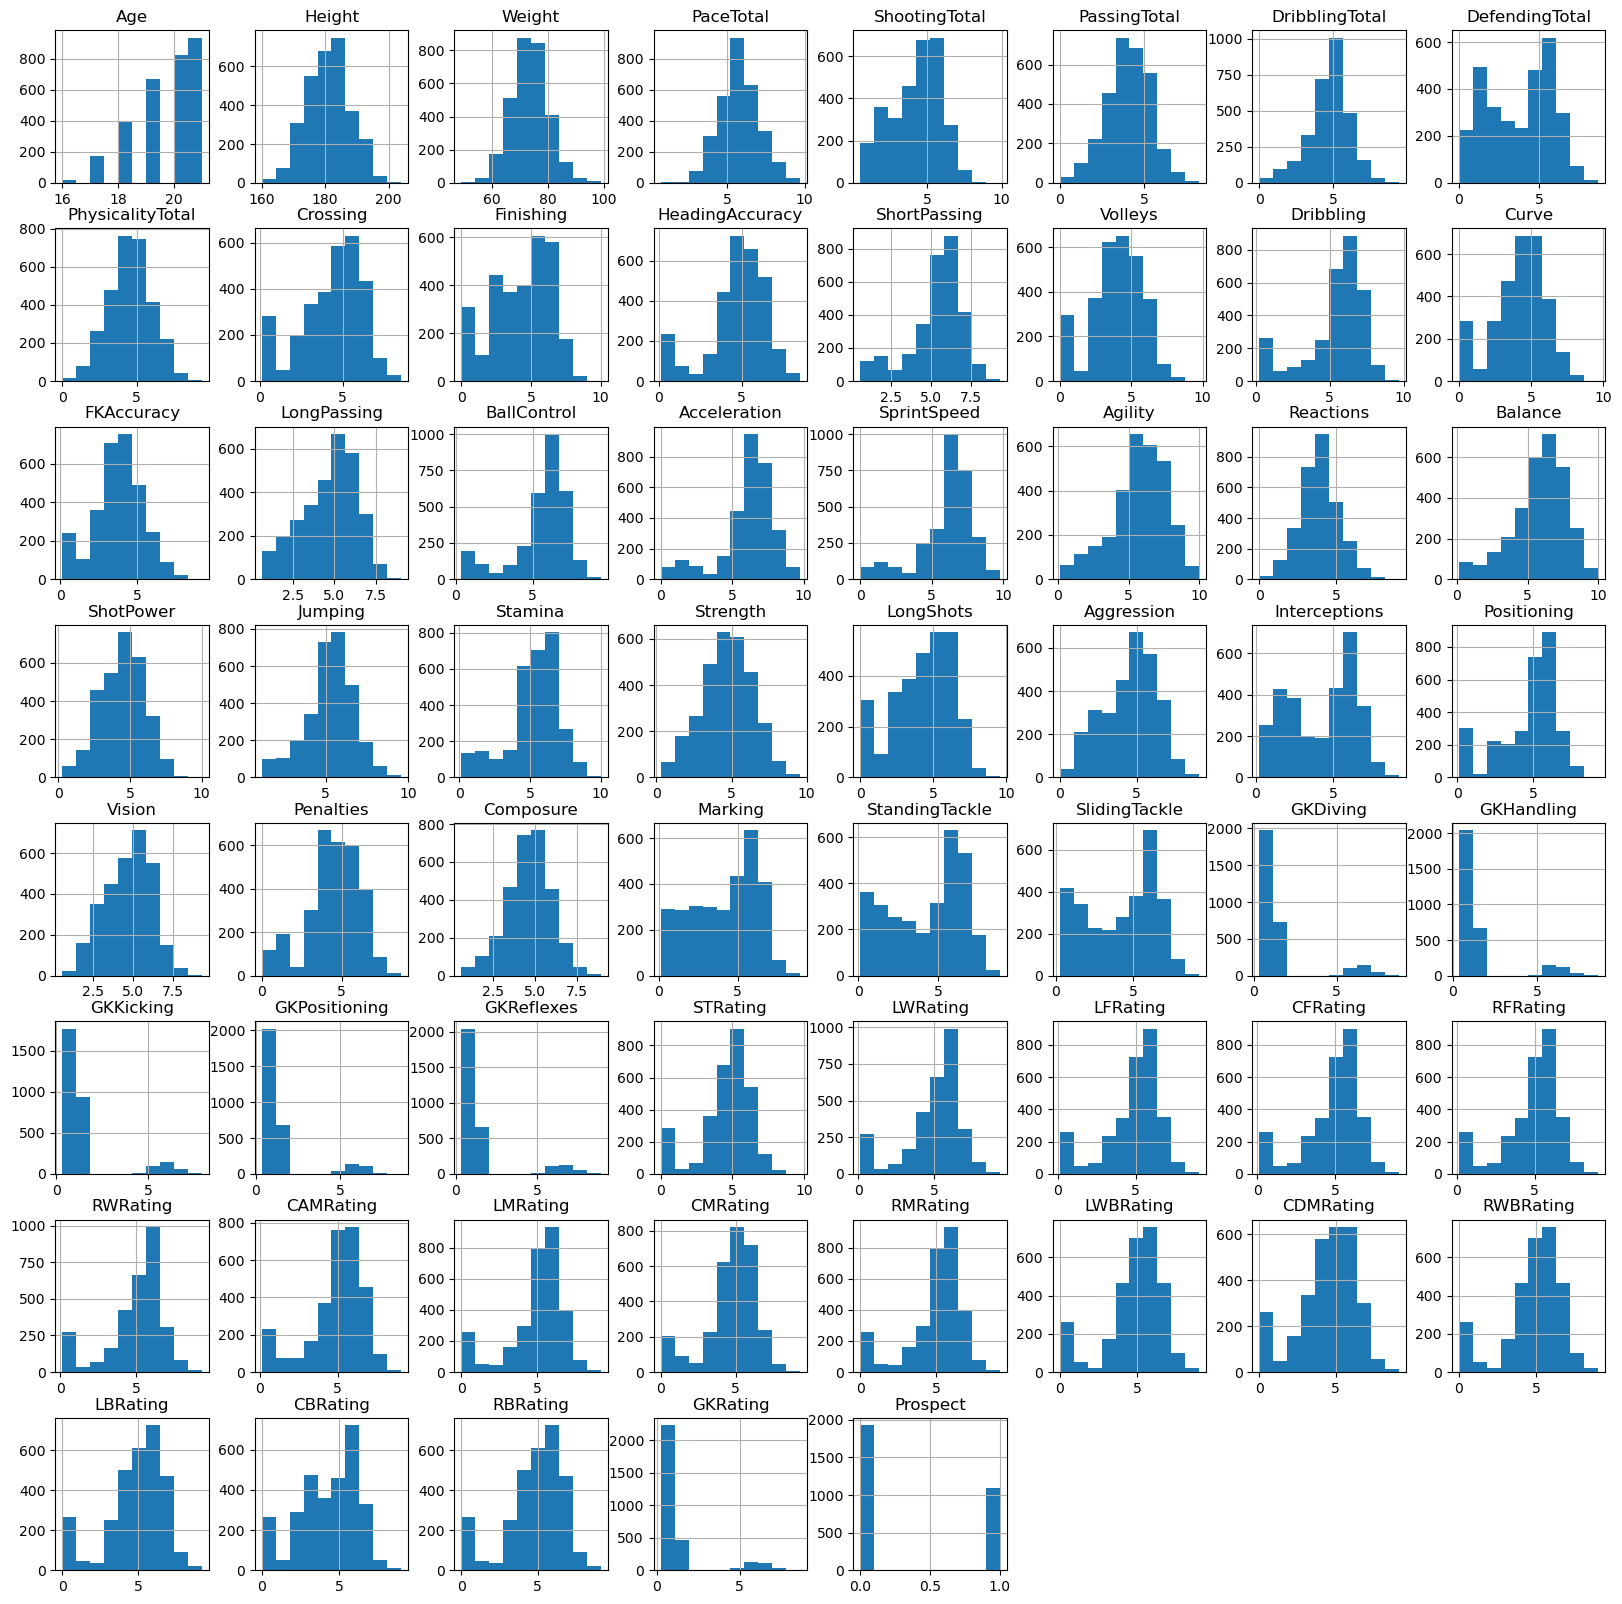

In [9]:
train.hist(figsize=(20, 20));

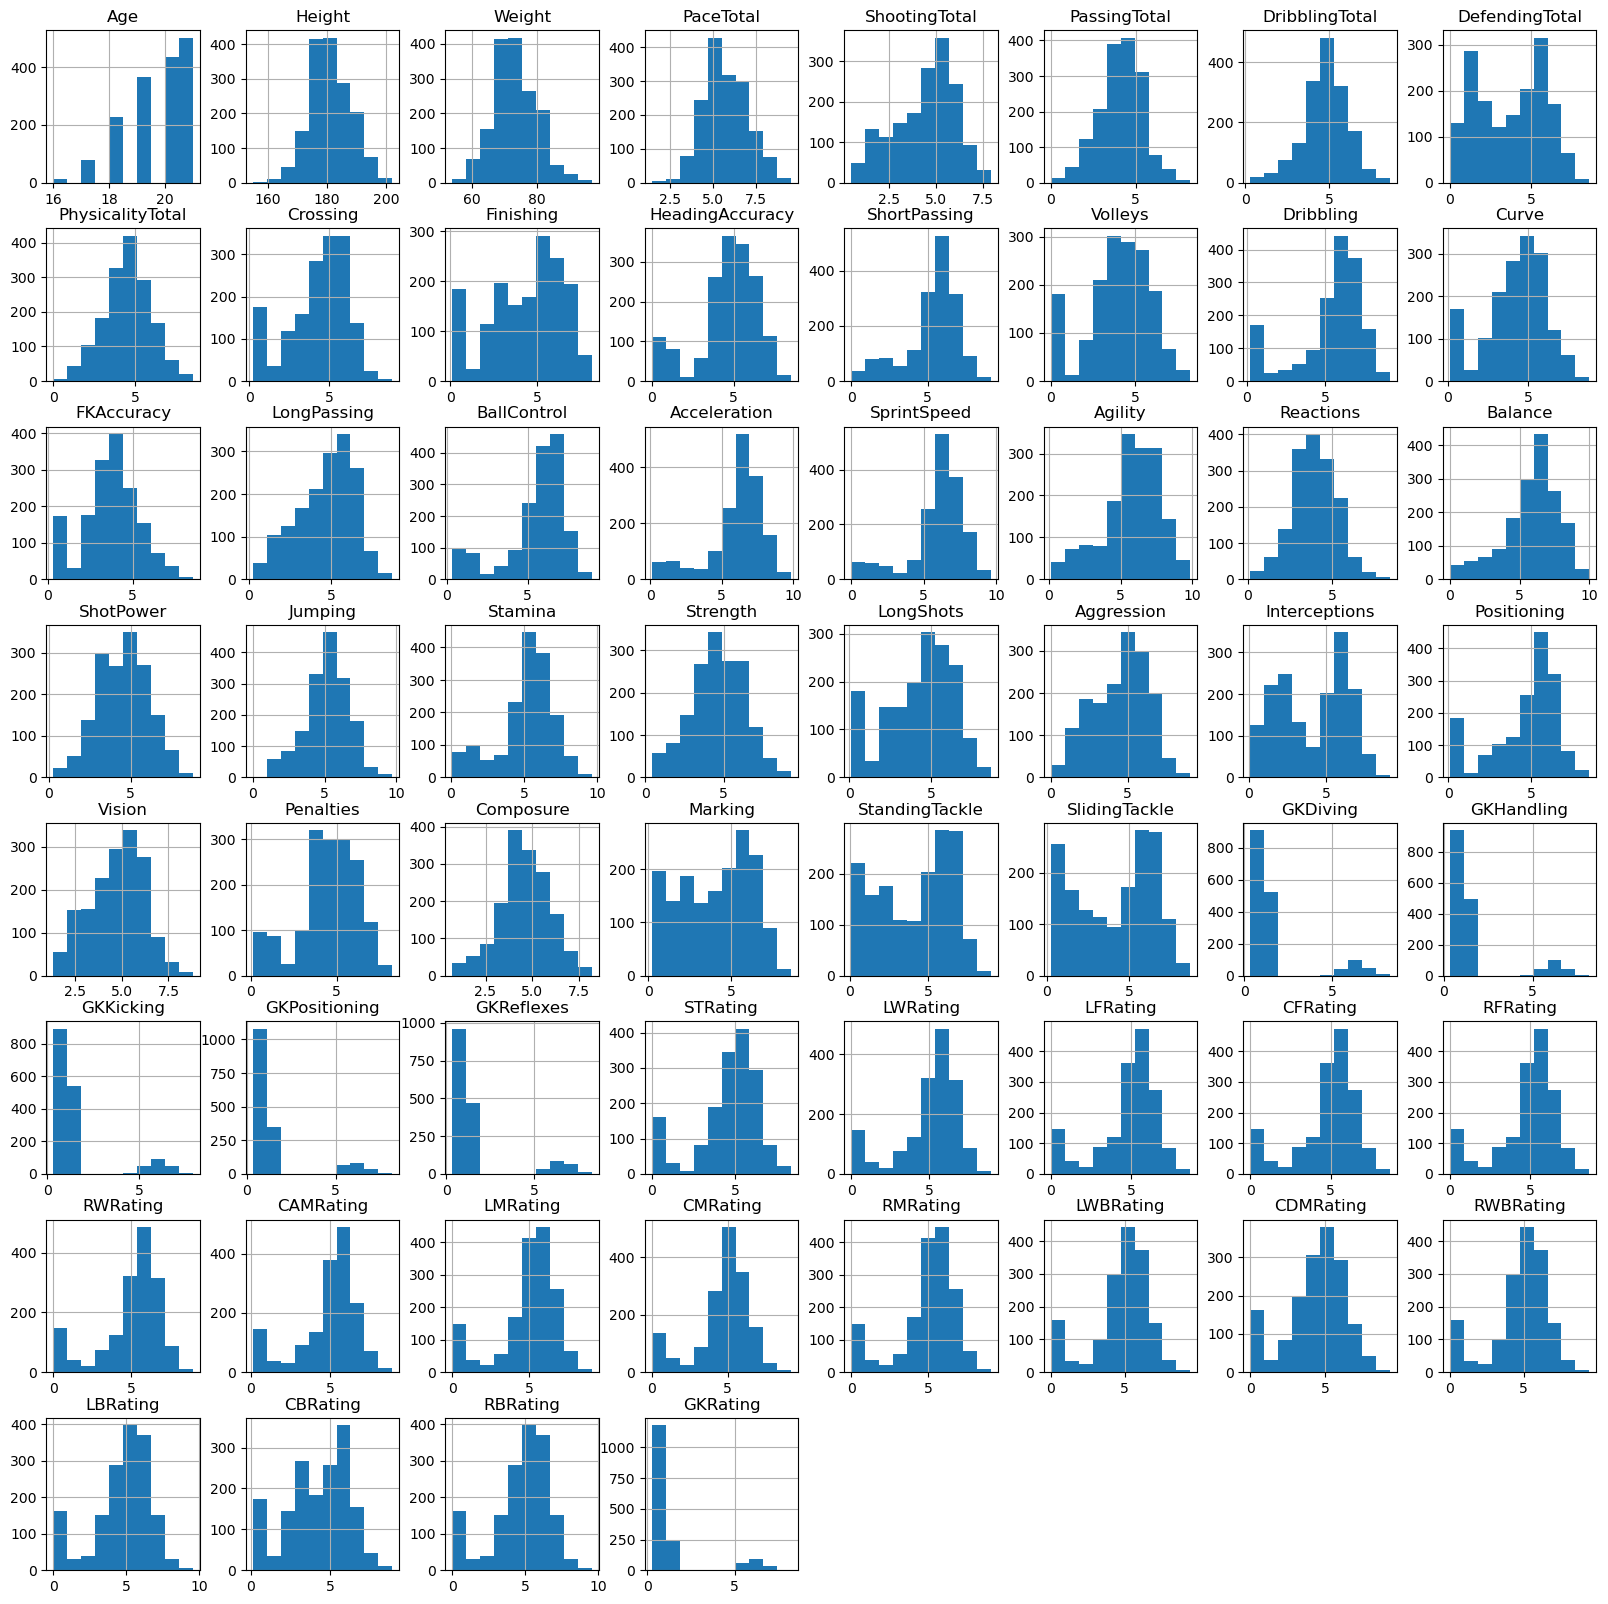

In [10]:
test.hist(figsize=(20, 20));

<AxesSubplot:ylabel='count'>

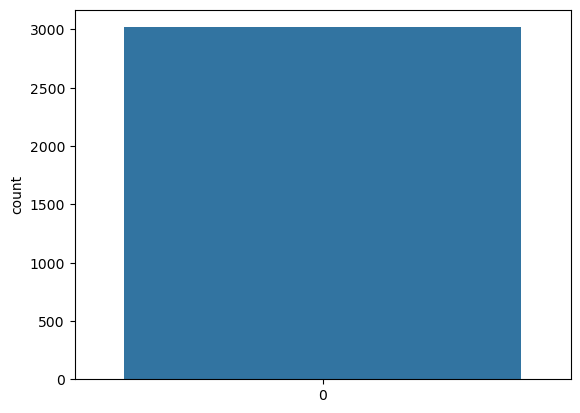

In [11]:
sns.countplot(train['Age'])

<AxesSubplot:ylabel='count'>

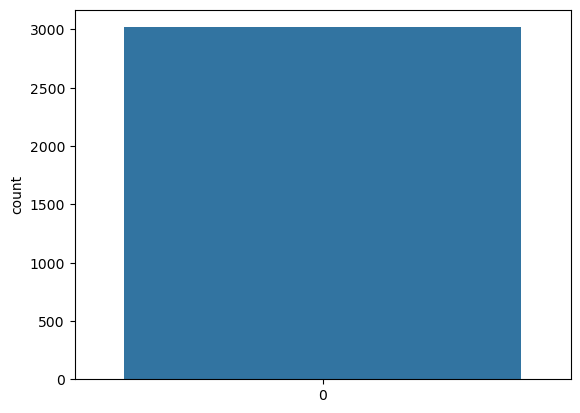

In [12]:
sns.countplot(train['Prospect'])

In [13]:
label_name = train['Prospect']
label_name

0       0
1       0
2       0
3       0
4       0
       ..
3014    1
3015    0
3016    0
3017    0
3018    0
Name: Prospect, Length: 3019, dtype: int64

In [14]:
train = train.drop(columns=['Prospect'])
train.shape

(3019, 65)

In [15]:
train = train.drop(columns=['ID'])
test = test.drop(columns=['ID'])

In [16]:
train.shape, test.shape

((3019, 64), (1626, 64))

# Scaling


In [17]:
# Min-Max scaling
num_cols = train.columns[train.dtypes != 'object'].to_list()
cat_cols = train.columns[train.dtypes == 'object'].to_list()
print(len(cat_cols)+len(num_cols))

64


In [18]:
normalize = num_cols
x = train[normalize].values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
train_temp = pd.DataFrame(x_scaled, columns=normalize, index=train.index)
train[normalize] = train_temp

In [19]:
normalize = num_cols
x = test[normalize].values
# test는 fit 하면 안됨
test_scaled = scaler.transform(x)
test_temp = pd.DataFrame(test_scaled, columns=normalize, index=test.index)
test[normalize] = test_temp

# Encoding 


In [20]:
# Label encoding
nunique = train.nunique()
types = train.dtypes

categorical_columns = []

for col in cat_cols:
    enc = LabelEncoder()
    train[col] = enc.fit_transform(train[col].values)
    test[col] = enc.transform(test[col].values)

In [21]:
print(train.shape)
train.head(2)

(3019, 64)


,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,1.0,0.5,0.66,1,1,2,2,0.435491,0.169020,0.392858,...,0.529415,0.529409,0.529415,0.687501,0.656247,0.687501,0.703125,0.723078,0.703125,0.074627
1,1.0,0.0,0.52,14,0,0,2,0.741940,0.732394,0.517856,...,0.705883,0.632350,0.705883,0.578128,0.484376,0.578128,0.546872,0.461541,0.546872,0.119403


In [84]:
X_test = test
X_test.shape 


(1626, 64)

In [85]:
print(test.shape)
test.head(2)

(1626, 64)


,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,0.2,0.545455,0.52,5,1,2,2,0.338712,0.521125,0.589280,...,0.014702,0.058818,0.014702,0.031251,0.046878,0.031251,0.031248,0.030772,0.031248,0.626866
1,0.6,0.636364,0.62,14,1,0,2,0.467742,0.464788,0.196423,...,0.455883,0.367650,0.455883,0.343750,0.296875,0.343750,0.328123,0.338466,0.328123,0.059701


# 학습 예측 데이터


In [86]:
X_train, X_val, y_train, y_val = train_test_split(train, label_name, train_size=0.8, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2415, 64), (604, 64), (2415,), (604,))

# tensorflow

In [63]:
import tensorflow as tf

In [87]:
input_shape = X_train.shape[1]
input_shape

64

## Deep Learning 
### Layers

In [106]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=128, input_shape=[input_shape]),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

## Deep Learning 
### complie


In [107]:
# 모델 컴파일 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                       ])

In [108]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 256)               33024     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 1)                 257       
                                                                 
Total params: 74,625
Trainable params: 74,625
Non-trai

In [110]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [111]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2,
                    callbacks=[early_stop, PrintDot()], verbose=0)

/opt/anaconda3/lib/python3.9/site-packages/keras/engine/data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]



.........................

In [112]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,precision_5,recall_5,val_loss,val_accuracy,val_precision_5,val_recall_5
20,0.453845,0.785197,0.720854,0.641813,0.481581,0.772257,0.705882,0.705882
21,0.437024,0.796066,0.740066,0.653509,0.490210,0.761905,0.680000,0.727273
22,0.459615,0.784679,0.718954,0.643275,0.520074,0.753623,0.742857,0.556150
23,0.432333,0.797619,0.734400,0.671053,0.499541,0.778468,0.798507,0.572192
24,0.435183,0.796584,0.732057,0.671053,0.495377,0.772257,0.736196,0.641711


In [113]:
y_pred = model.predict(X_test)
y_pred.shape

51/51 [==============================] - 0s 601us/step


(1626, 1)

In [95]:
y_predict = (y_pred.flatten()>=0.5).astype(int)
y_predict.shape

(1626,)

In [116]:
loss, accuracy, precision, recall = model.evaluate(X_val, y_val)
print("loss값 : ", loss)
print("accuracy값 : ", accuracy)
print("precision값 : ", precision)
print("recall값 : ", recall)

19/19 [==============================] - 0s 993us/step - loss: 0.4936 - accuracy: 0.7566 - precision_5: 0.6935 - recall_5: 0.5890
loss값 :  0.4936039447784424
accuracy값 :  0.7566224932670593
precision값 :  0.6935483813285828
recall값 :  0.5890411138534546


# 제출

In [99]:
sub = pd.read_csv("data/football/sample_submission.csv")
sub.shape

(1626, 2)

In [100]:
sub['Prospect'] = y_predict

In [103]:
sub.to_csv("data/football/sub1.csv",index=False)

In [105]:
pd.read_csv("data/football/sub1.csv")

,ID,Prospect
0,TEST_0000,1
1,TEST_0001,0
2,TEST_0002,1
3,TEST_0003,0
4,TEST_0004,0
...,...,...
1621,TEST_1621,1
1622,TEST_1622,0
1623,TEST_1623,0
1624,TEST_1624,1
